In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [14]:
from sklearn.metrics import pairwise_distances

In [69]:
X, y = make_blobs(1000, 2, 2)

In [70]:
X

array([[ 6.07855175, -1.75398422],
       [-4.54422234,  4.48654076],
       [-3.33960695,  7.82787682],
       ...,
       [-3.47315793,  8.06865153],
       [-1.21776006,  6.35172137],
       [-3.34006608,  7.23880195]])

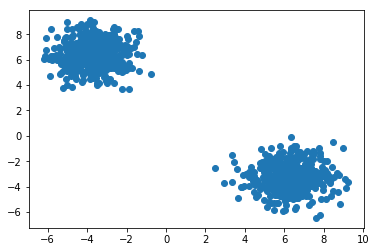

In [71]:
plt.scatter(X[:,0], X[:,1])

In [72]:
for i in range(2, 10):
    km = KMeans(i)
    pred = km.fit_predict(X)
    print(i, compute_DB_index(X, pred, km.cluster_centers_, 2), DB_index(X, km.cluster_centers_, pred))
    
    

2 2.0 0.1824016611742867
3 3.202941235322326 0.8560118897145778
4 4.153810005710347 1.227203560722493
5 5.7148874623712524 1.0523941725283283
6 6.520433831357689 0.9395235142930862
7 7.7137835633001925 0.9280544132508384
8 9.063951022137092 0.9237303907423151
9 9.81576778967547 0.8975398736461224


In [49]:
from scipy.spatial import distance
def compute_s(i, x, labels, clusters):
    norm_c= len(clusters)
    s = 0
    for x in clusters:
        # print x
        s += distance.euclidean(x, clusters[i])
    return s

def compute_Rij(i, j, x, labels, clusters, nc):
    Rij = 0
    try:
        # print "h"
        d = distance.euclidean(clusters[i],clusters[j])
        # print d
        Rij = (compute_s(i, x, labels, clusters) + compute_s(j, x, labels, clusters))/d
        # print Rij
    except:
        Rij = 0	
    return Rij

def compute_R(i, x, labels, clusters, nc): 
    list_r = []
    for i in range(nc):
        for j in range(nc):
            if(i!=j):
                temp = compute_Rij(i, j, x, labels, clusters, nc)
                list_r.append(temp)

    return max(list_r)

def compute_DB_index(x, labels, clusters, nc):
    # print x
    sigma_R = 0.0
    for i in range(nc):
        sigma_R = sigma_R + compute_R(i, x, labels, clusters, nc)

    DB_index = float(sigma_R)/float(nc)
    return DB_index

AttributeError: module 'numpy' has no attribute 'distance'

In [19]:
pairwise_distances(km.cluster_centers_).sum() / 2

20.13542622603603

In [19]:
pairwise_distances(km.cluster_centers_).sum() / 2

20.13542622603603

In [19]:
pairwise_distances(km.cluster_centers_).sum() / 2

20.13542622603603

In [67]:
def DB_index(X, clusters_centers, labels):
    n_clusters = len(clusters_centers)
     
    d = np.array([distance.euclidean(X[i], clusters_centers[labels[i]]) for i in range(len(X))])
    mean_dist = np.zeros(n_clusters)
    for i in range(n_clusters):
        mean_dist[i] = d[labels == i].mean()
    
    #print(n_clusters, mean_dist)
    
    
    return sum([max([(mean_dist[i] + mean_dist[j]) / distance.euclidean(clusters_centers[i], clusters_centers[j]) 
         for i in range(n_clusters) if i != j]) for j in range(n_clusters)]) / n_clusters

In [62]:
km = KMeans(2)
pred = km.fit_predict(X)
#print(i, compute_DB_index(X, pred, km.cluster_centers_, 2), DB_index(X, km.cluster_centers_, pred))

In [63]:
DB_index(X, km.cluster_centers_, pred)

2 [3.59980818 2.56767266]


0.588406489398257